#### Objective

Implement **various methods** for handling missing data.

#### Libraries

In [21]:
import pandas as pd
import warnings
import seaborn as sns
import numpy as np

np.random.seed(4)
warnings.filterwarnings("ignore")

#### Data Exploration

In [22]:
# read the data
df = pd.read_csv("D:\ProjectData\Fish.csv")

# check data frame shape
df.shape

(159, 7)

In [4]:
# check column names and first few rows
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
# simulate missing data

for column in ["Species", "Length2", "Width"]:
    # generate a random fraction between 0 and 0.5
    frac = np.random.rand() * 0.5
    # randomly select a fraction of rows and set to NaN
    df.loc[df.sample(frac=frac).index, column] = np.nan

In [6]:
# check data types
df.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [7]:
# check for missing values
df.isnull().sum()

Species    77
Weight      0
Length1     0
Length2    32
Length3     0
Height      0
Width      31
dtype: int64

#### 1. Dropping rows with missing values

In [8]:
# make a copy of the dataframe
df_dr = df.copy()

# remove rows with NaN
df_dr = df.dropna()

#### 2. Dropping variables with missing values

In [9]:
# make a copy of the dataframe
df_dv = df.copy()

# drop columns that contain missing values
df_dv = df.drop(['Species', 'Length2', 'Width'], 1)

#### 3. Imputing on Continuous and Categorical data

In [10]:
from sklearn.impute import SimpleImputer

# copy dataframe
df_imp = df.copy()

# initialize imputers
num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

# impute separately for numerical and categorical columns
numerical_cols = ['Length2','Width']
categorical_cols = ['Species']

df_imp[numerical_cols] = num_imputer.fit_transform(df_imp[numerical_cols])
df_imp[categorical_cols] = cat_imputer.fit_transform(df_imp[categorical_cols])

# check original dataframe
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,NaN,30.0,11.5200,4.0200
1,NaN,290.0,24.0,NaN,31.2,12.4800,4.3056
2,NaN,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,NaN
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [11]:
# check imputed dataframe
df_imp.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,28.750394,30.0,11.5200,4.020000
1,Perch,290.0,24.0,28.750394,31.2,12.4800,4.305600
2,Perch,340.0,23.9,26.500000,31.1,12.3778,4.696100
3,Bream,363.0,26.3,29.000000,33.5,12.7300,4.430721
4,Bream,430.0,26.5,29.000000,34.0,12.4440,5.134000


#### 4. Prediction of missing values

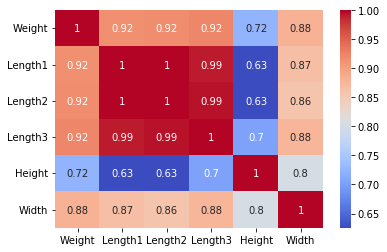

In [13]:
# compute the correlation matrix
correlation_matrix = df.corr()

# display the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [14]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

# copy dataframe
df_p = df.copy()

# drop species column
df_p = df_p.drop(['Species'], 1)

imputer = IterativeImputer(estimator=LinearRegression())
dp_imputed = imputer.fit_transform(df_p)

# Convert the imputed data back to a DataFrame
dp_imputed = pd.DataFrame(dp_imputed, columns=df_p.columns)

dp_imputed.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.454756,30.0,11.5200,4.020000
1,290.0,24.0,26.369824,31.2,12.4800,4.305600
2,340.0,23.9,26.500000,31.1,12.3778,4.696100
3,363.0,26.3,29.000000,33.5,12.7300,4.785959
4,430.0,26.5,29.000000,34.0,12.4440,5.134000


#### 5. KNN Imputation

In [15]:
from sklearn.impute import KNNImputer

# copy dataframe
df_knn = df.copy()

# drop species column
df_knn = df_knn.drop(['Species'], 1)

# fit and apply KNN imputer
imputer = KNNImputer(n_neighbors=3)
df_knn = pd.DataFrame(imputer.fit_transform(df_knn), columns = df_knn.columns)

df_knn.head()

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,26.5,30.0,11.5200,4.020000
1,290.0,24.0,26.9,31.2,12.4800,4.305600
2,340.0,23.9,26.5,31.1,12.3778,4.696100
3,363.0,26.3,29.0,33.5,12.7300,4.581967
4,430.0,26.5,29.0,34.0,12.4440,5.134000


#### 6. Multiple Imputation

In [16]:
from sklearn.ensemble import RandomForestRegressor

# copy dataframe
df_mi = df.copy()

# drop species column
df_mi = df_mi.drop(['Species'], 1)

# number of imputations
num_imputations = 5

# initialize a list to store imputed DataFrames
imputed_dfs = []

# perform multiple imputations
for i in range(num_imputations):
    
    # initialize the imputer with a RandomForestRegressor
    imputer = IterativeImputer(estimator=RandomForestRegressor())

    # fit and transform the entire dataset
    df_imputed = pd.DataFrame(imputer.fit_transform(df_mi), columns=df_mi.columns)

    # append the imputed DataFrame to the list
    imputed_dfs.append(df_imputed.copy())
